# OpenAI Embeddings


Hướng dẫn này khám phá việc sử dụng các mô hình `OpenAI Text embedding` trong framework `LangChain`.

Nó trình bày cách tạo ra các `embeddings` cho truy vấn văn bản và tài liệu, giảm chiều của chúng bằng **PCA** (Principal Component Analysis), và trực quan hóa chúng ở dạng 2D để dễ diễn giải hơn.

Bằng cách phân tích mối quan hệ giữa truy vấn và tài liệu thông qua `cosine similarity` (độ tương đồng cosine), nó cung cấp thông tin chi tiết về cách `embeddings` có thể nâng cao quy trình làm việc, bao gồm **text analysis** (phân tích văn bản) và **data visualization** (trực quan hóa dữ liệu).


### References

- [OpenAI](https://openai.com/index/new-embedding-models-and-api-updates/)
- [LangChain OpenAI Embeddings](https://python.langchain.com/api_reference/openai/embeddings/langchain_openai.embeddings.base.OpenAIEmbeddings.html)
- [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity)
- [Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
----

## Load model and set dimension

Mô tả mô hình `Embedding` và cài đặt kích thước được hỗ trợ bởi OpenAI.

### Tại sao cần điều chỉnh kích thước Embedding?

* **Tối ưu hóa tài nguyên**: Các `embeddings` được rút gọn sử dụng ít bộ nhớ và tính toán hơn.
* **Sử dụng linh hoạt**: Các mô hình như text-embedding-3-large cho phép giảm kích thước với API `dimensions`.
* **Thông tin chi tiết quan trọng**: Ngay cả ở kích thước 256, hiệu suất có thể vượt trội so với các mô hình lớn hơn như text-embedding-ada-002.

Đây là **mô tả về các mô hình** được hỗ trợ bởi OpenAI.

<table>
  <thead>
    <tr>
      <th style="text-align: center;">Mô hình</th>
      <th style="text-align: center;">~ Trang trên mỗi Đô la</th>
      <th style="text-align: center;">Hiệu suất trên MTEB Eval</th>
      <th style="text-align: center;">Đầu vào tối đa</th>
      <th style="text-align: center;">Kích thước khả dụng</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center;">text-embedding-3-small</td>
      <td style="text-align: center;">62,500</td>
      <td style="text-align: center;">62.3%</td>
      <td style="text-align: center;">8191</td>
      <td style="text-align: center;">512, 1536</td>
    </tr>
    <tr>
      <td style="text-align: center;">text-embedding-3-large</td>
      <td style="text-align: center;">9,615</td>
      <td style="text-align: center;">64.6%</td>
      <td style="text-align: center;">8191</td>
      <td style="text-align: center;">256, 1024, 3072</td>
    </tr>
    <tr>
      <td style="text-align: center;">text-embedding-ada-002</td>
      <td style="text-align: center;">12,500</td>
      <td style="text-align: center;">61.0%</td>
      <td style="text-align: center;">8191</td>
      <td style="text-align: center;">1536</td>
    </tr>
  </tbody>
</table>


In [2]:
from dotenv import load_dotenv

load_dotenv(override=True, dotenv_path="../.env")

True

In [3]:
from langchain_openai import OpenAIEmbeddings

# Set desired model
openai_embedding = OpenAIEmbeddings(model="text-embedding-3-large")

**[note]** If dimension reduction is necessary, please set as below.

In [4]:
from langchain_openai import OpenAIEmbeddings

# Set desired model and dimension
openai_embedding = OpenAIEmbeddings(model="text-embedding-3-large", dimensions=1024)

Define `query` and `documents`

In [5]:
query = "What is the Open AI's gpt embedding model?"

# Various embedding models
documents = [
    "all-mpnet-base-v2",
    "bert-base-nli-mean-tokens",
    "bert-large-nli-mean-tokens",
    "distilbert-base-nli-mean-tokens",
    "roberta-base-nli-stsb-mean-tokens",
    "roberta-large-nli-stsb-mean-tokens",
    "sentence-transformers/all-MiniLM-L12-v2",
    "sentence-transformers/all-distilroberta-v1",
    "sentence-transformers/paraphrase-MiniLM-L3-v2",
    "sentence-transformers/paraphrase-mpnet-base-v2",
    "sentence-transformers/msmarco-distilbert-base-v3",
    "sentence-transformers/msmarco-MiniLM-L6-cos-v5",
    "sentence-transformers/msmarco-roberta-base-v2",
    "xlnet-base-cased",
    "facebook/bart-large",
    "facebook/dpr-question_encoder-single-nq-base",
    "google/electra-small-discriminator",
    "google/electra-base-discriminator",
    "google/electra-large-discriminator",
    "deepset/sentence_bert",
    "deepset/roberta-base-squad2",
    "gpt-neo-125M",
    "gpt-neo-1.3B",
    "gpt-neo-2.7B",
    "gpt-j-6B",
    "text-embedding-ada-002",
    "text-embedding-3-small",
    "text-embedding-3-large",
    "all-MiniLM-L6-v2",
    "multilingual-e5-base",
]

In [6]:
query_vector = openai_embedding.embed_query(query)
docs_vector = openai_embedding.embed_documents(documents)

print("number of documents: " + str(len(docs_vector)))
print("dimension: " + str(len(docs_vector[0])))

# Part of the sliced ​​vector
print("query: " + str(query_vector[:5]))
print("documents[0]: " + str(docs_vector[0][:5]))
print("documents[1]: " + str(docs_vector[1][:5]))

number of documents: 30
dimension: 1024
query: [-0.003931017126888037, 0.027863724157214165, -0.016019951552152634, -0.029588300734758377, 0.03313889726996422]
documents[0]: [-0.04586467891931534, 0.0055938707664608955, -0.03505660966038704, -0.018464835360646248, -0.003008920233696699]
documents[1]: [0.007064207457005978, -0.021419374272227287, -0.02630327269434929, -0.0381874218583107, -0.00959918275475502]


## Similarity Calculation (Cosine Similarity)

This code calculates the similarity between the query and the document through `Cosine Similarity` .  
Find the documents **similar (top 3) and (bottom 3)** .

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
similarity = cosine_similarity([query_vector], docs_vector)

# Sorting by in descending order
sorted_idx = similarity.argsort()[0][::-1]

# Display top 3 and bottom 3 documents based on similarity
print("Top 3 most similar document:")
for i in range(0, 3):
    print(
        f"[{i+1}] similarity: {similarity[0][sorted_idx[i]]:.3f} | {documents[sorted_idx[i]]}"
    )

print("\nBottom 3 least similar documents:")
for i in range(1, 4):
    print(
        f"[{i}] similarity: {similarity[0][sorted_idx[-i]]:.3f} | {documents[sorted_idx[-i]]}"
    )

Top 3 most similar document:
[1] similarity: 0.525 | text-embedding-3-large
[2] similarity: 0.485 | text-embedding-ada-002
[3] similarity: 0.470 | text-embedding-3-small

Bottom 3 least similar documents:
[1] similarity: 0.062 | facebook/bart-large
[2] similarity: 0.144 | multilingual-e5-base
[3] similarity: 0.172 | all-mpnet-base-v2


## Embeddings visualization(PCA)

Giảm chiều của các `embeddings` cho mục đích trực quan hóa.
Đoạn mã này sử dụng **phân tích thành phần chính (PCA)** để giảm các vector `embedding` chiều cao xuống **hai chiều**.
Các **điểm 2D** kết quả được hiển thị trong biểu đồ phân tán, với mỗi điểm được gắn nhãn cho tài liệu tương ứng của nó.

### Tại sao cần giảm chiều?

Các vector `embedding` chiều cao rất khó diễn giải và phân tích trực tiếp.
Bằng cách giảm chúng xuống 2D, chúng ta có thể:

* **Khám phá trực quan các mối quan hệ** giữa các `embeddings` (ví dụ: phân cụm, nhóm).
* **Xác định các mẫu hoặc điểm bất thường** trong dữ liệu mà có thể không rõ ràng ở chiều cao.
* **Cải thiện khả năng diễn giải**, làm cho dữ liệu dễ tiếp cận hơn cho phân tích của con người và ra quyết định.



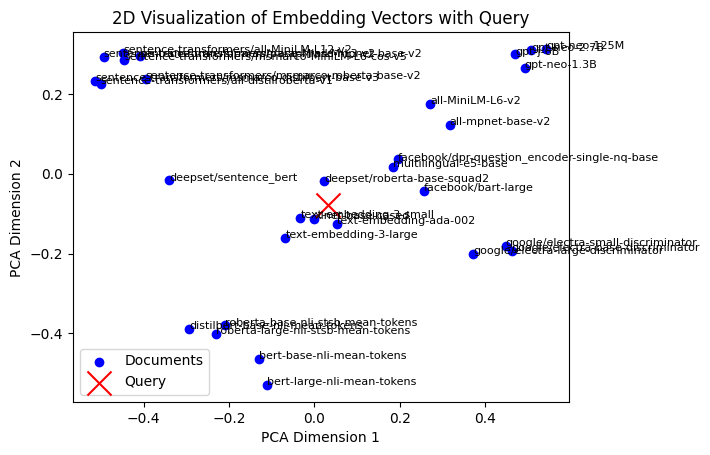

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Combine documents and query for PCA
all_vectors = np.vstack([docs_vector, query_vector])  # Stack query vector with docs
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(all_vectors)

# Separate reduced vectors for documents and query
doc_vectors_2d = reduced_vectors[:-1]  # All but the last point (documents)
query_vector_2d = reduced_vectors[-1]  # Last point (query)

# Plot the reduced vectors
plt.scatter(doc_vectors_2d[:, 0], doc_vectors_2d[:, 1], color="blue", label="Documents")
plt.scatter(
    query_vector_2d[0],
    query_vector_2d[1],
    color="red",
    label="Query",
    marker="x",
    s=300,
)

# Annotate document points
for i, doc in enumerate(documents):
    plt.text(doc_vectors_2d[i, 0], doc_vectors_2d[i, 1], doc, fontsize=8)

# Add plot details
plt.title("2D Visualization of Embedding Vectors with Query")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.show()